# MindInsight Classifier: Unveiling Mental Health Patterns in Pandemic Discourse through Data-Driven Analysis

Let us first import the pertinent libraries.

In [70]:
#!pip install wordcloud

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mental_disorders_reddit.csv')

In [3]:
df.head()

,title,selftext,created_utc,over_18,subreddit
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD
4,help,[removed],1650350907,False,BPD


### Data Preprocessing and Simple EDA (Part 1)

In [4]:
print(df.shape)

(701787, 5)


In [5]:
df.isnull().sum()

title             46
selftext       33691
created_utc        0
over_18            0
subreddit          0
dtype: int64

In [6]:
df = df.dropna(subset=['selftext'], how='any')

In [7]:
df.isnull().sum()

title          42
selftext        0
created_utc     0
over_18         0
subreddit       0
dtype: int64

In [8]:
df['subreddit'].value_counts()

BPD              233125
Anxiety          167059
depression       156717
bipolar           46666
mentalillness     44249
schizophrenia     20280
Name: subreddit, dtype: int64

In [9]:
df['title'] = df['title'].fillna('')

# Calculate the total number of words in 'title'
df['title_total'] = df['title'].apply(lambda x: len(x.split()))

# Define a function to count total characters in a text (excluding spaces)
def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

# Calculate the total number of characters in 'title'
df['title_chars'] = df['title'].apply(count_total_words)

In [10]:
df.head()

,title,selftext,created_utc,over_18,subreddit,title_total,title_chars
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD,6,30
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD,2,9
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD,6,16
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD,3,21
4,help,[removed],1650350907,False,BPD,1,4


In [11]:
df['text_total'] = df['selftext'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

df['text_chars'] = df["selftext"].apply(count_total_words)

In [12]:
df.head()

,title,selftext,created_utc,over_18,subreddit,title_total,title_chars,text_total,text_chars
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD,6,30,74,310
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD,2,9,517,2259
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD,6,16,145,545
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD,3,21,821,3282
4,help,[removed],1650350907,False,BPD,1,4,1,9


### Data Downsizing

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668096 entries, 0 to 701786
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   title        668096 non-null  object
 1   selftext     668096 non-null  object
 2   created_utc  668096 non-null  int64 
 3   over_18      668096 non-null  bool  
 4   subreddit    668096 non-null  object
 5   title_total  668096 non-null  int64 
 6   title_chars  668096 non-null  int64 
 7   text_total   668096 non-null  int64 
 8   text_chars   668096 non-null  int64 
dtypes: bool(1), int64(5), object(3)
memory usage: 46.5+ MB


The number of data is 666,8096. It is very large and takes a lot of time to process. As we wish to spotlight the posts published during the duration of the COVID-19 pandemic, we will be limiting our data to only include posts from March 2020 onwards. A random sample of 10,000 posts will be taken from the dataset for efficiency.

In [14]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [15]:
df.head()

,title,selftext,created_utc,over_18,subreddit,title_total,title_chars,text_total,text_chars
0,Life is so pointless without others,Does anyone else think the most important part...,2022-04-19 08:29:20,False,BPD,6,30,74,310
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,2022-04-19 08:24:20,False,BPD,2,9,517,2259
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,2022-04-19 08:02:59,False,BPD,6,16,145,545
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",2022-04-19 07:30:30,False,BPD,3,21,821,3282
4,help,[removed],2022-04-19 06:48:27,False,BPD,1,4,1,9


In [16]:
# Filter posts from March 2020 onwards
filtered_df = df[df['created_utc'] >= '2020-03-01']

# Take a random sample of 1000 posts
sampled_df = filtered_df.sample(n=1000, random_state=42)

In [18]:
sampled_df.head()

,title,selftext,created_utc,over_18,subreddit,title_total,title_chars,text_total,text_chars
131450,Looking for hope (feeling fed up),My diagnosis is fairly new and I havent starte...,2020-05-30 22:47:57,False,BPD,6,28,344,1414
691395,Get motivated with determination you can do an...,Like I just managed to cut with a safety razor,2020-05-17 15:31:50,False,mentalillness,8,45,10,37
275676,memory flashes,"so, I used to have a really good memory\n\n&am...",2022-10-13 18:02:41,False,bipolar,2,13,91,424
392360,I'll never get to live in the fantasy land for...,I won't ever get to turn my fantasies into rea...,2022-03-01 07:58:19,False,depression,10,41,72,288
313915,It's my 27 birthday and I don't know wtf with ...,[removed],2022-02-26 21:42:56,False,depression,13,50,1,9


In [19]:
sampled_df['subreddit'].value_counts()

depression       297
Anxiety          275
BPD              247
mentalillness     77
bipolar           72
schizophrenia     32
Name: subreddit, dtype: int64

### Recategorizing 'subreddit'

In [20]:
# def mental_disorders(ex):
#     if ex == 'BPD':
#         return 'BPD'
#     elif ex == 'bipolar':
#         return 'bipolar'
#     elif ex == 'Anxiety':
#         return 'anxiety'
#     elif ex == 'schizophrenia':
#         return 'schizophrenia'
#     elif ex == 'depression':
#         return 'depression'
#     else:
#         return 'others'

def mental_disorders(ex):
    if ex== 'schizophrenia':
        return 'schizophrenia'
    elif ex == 'Anxiety':
        return 'Anxiety'
    else:
        return 'others'

In [21]:
sampled_df['subreddit'] = sampled_df['subreddit'].apply(mental_disorders)

In [22]:
sampled_df.head(20)

,title,selftext,created_utc,over_18,subreddit,title_total,title_chars,text_total,text_chars
131450,Looking for hope (feeling fed up),My diagnosis is fairly new and I havent starte...,2020-05-30 22:47:57,False,others,6,28,344,1414
691395,Get motivated with determination you can do an...,Like I just managed to cut with a safety razor,2020-05-17 15:31:50,False,others,8,45,10,37
275676,memory flashes,"so, I used to have a really good memory\n\n&am...",2022-10-13 18:02:41,False,others,2,13,91,424
392360,I'll never get to live in the fantasy land for...,I won't ever get to turn my fantasies into rea...,2022-03-01 07:58:19,False,others,10,41,72,288
313915,It's my 27 birthday and I don't know wtf with ...,[removed],2022-02-26 21:42:56,False,others,13,50,1,9
538129,tips for managing the AAAA ?,I've been medically diagnosed with a general a...,2021-08-06 01:54:21,False,Anxiety,6,23,113,506
293850,Breakup depression and self isolated without r...,[removed],2022-08-06 09:23:21,False,others,7,49,1,9
402501,I really can’t get out of this,The last month my depression reach its lowest ...,2022-07-05 22:33:20,False,others,7,24,168,698
566855,anxiety over such insignificant things….,just had to reschedule a doctor’s appointment ...,2021-08-18 22:51:22,False,Anxiety,5,36,192,860
357103,My dog died and I have nothing left.,My marriage isn't doing great. Dog was healthy...,2022-08-25 20:40:17,False,others,8,29,196,757


In [23]:
# We will remove the rows under selftext with have '[removed]'

sampled_df = sampled_df[sampled_df['selftext'] != '[removed]']

In [24]:
sampled_df.head(20)

,title,selftext,created_utc,over_18,subreddit,title_total,title_chars,text_total,text_chars
131450,Looking for hope (feeling fed up),My diagnosis is fairly new and I havent starte...,2020-05-30 22:47:57,False,others,6,28,344,1414
691395,Get motivated with determination you can do an...,Like I just managed to cut with a safety razor,2020-05-17 15:31:50,False,others,8,45,10,37
275676,memory flashes,"so, I used to have a really good memory\n\n&am...",2022-10-13 18:02:41,False,others,2,13,91,424
392360,I'll never get to live in the fantasy land for...,I won't ever get to turn my fantasies into rea...,2022-03-01 07:58:19,False,others,10,41,72,288
538129,tips for managing the AAAA ?,I've been medically diagnosed with a general a...,2021-08-06 01:54:21,False,Anxiety,6,23,113,506
402501,I really can’t get out of this,The last month my depression reach its lowest ...,2022-07-05 22:33:20,False,others,7,24,168,698
566855,anxiety over such insignificant things….,just had to reschedule a doctor’s appointment ...,2021-08-18 22:51:22,False,Anxiety,5,36,192,860
357103,My dog died and I have nothing left.,My marriage isn't doing great. Dog was healthy...,2022-08-25 20:40:17,False,others,8,29,196,757
443776,Spiraling out of control,Do you ever get to where you feel fine one min...,2022-05-09 02:03:26,True,others,4,21,146,650
87944,Pms exacerbating neediness for fp,I've been working hard with my therapist on co...,2021-01-18 00:09:14,False,others,5,29,90,381


### Text Pre-Processing

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re

string.punctuation
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to C:\Users\Don
[nltk_data]     Bosco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Don
[nltk_data]     Bosco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Don
[nltk_data]     Bosco\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Don
[nltk_data]     Bosco\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
sampled_df.head()

,title,selftext,created_utc,over_18,subreddit,title_total,title_chars,text_total,text_chars
131450,Looking for hope (feeling fed up),My diagnosis is fairly new and I havent starte...,2020-05-30 22:47:57,False,others,6,28,344,1414
691395,Get motivated with determination you can do an...,Like I just managed to cut with a safety razor,2020-05-17 15:31:50,False,others,8,45,10,37
275676,memory flashes,"so, I used to have a really good memory\n\n&am...",2022-10-13 18:02:41,False,others,2,13,91,424
392360,I'll never get to live in the fantasy land for...,I won't ever get to turn my fantasies into rea...,2022-03-01 07:58:19,False,others,10,41,72,288
538129,tips for managing the AAAA ?,I've been medically diagnosed with a general a...,2021-08-06 01:54:21,False,Anxiety,6,23,113,506


In [27]:
sampled_df['all_text'] = sampled_df['title'] + " " + sampled_df['selftext']

df = sampled_df[['all_text', 'subreddit']]
df = df[df['subreddit'] != 'others']

df.head()

,all_text,subreddit
538129,tips for managing the AAAA ? I've been medical...,Anxiety
566855,anxiety over such insignificant things…. just ...,Anxiety
496598,EMDR? Has anyone here used emdr therapy before...,Anxiety
613187,Getting anxious about coming to gym I used to ...,Anxiety
633253,Nicotine Helps me think I found without nicoti...,schizophrenia


In [28]:
# Define the abbreviations dictionary
abbr_dict = {
    "'cause": "because",
    "ain't": "am not",
    "can't": "can not",
    "cannot": "can not",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesnt": "does not",
    "don't": "do not",
    "dont": "do not",
    "gimme": "give me",
    "gotta": "got to",
    "hadn't": "had not",
    "hadnt": "had not",
    "hasn't": "has not",
    "hasnt": "has not",
    "haven't": "have not",
    "havent": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "here's": "here is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'm": "i am",
    "i'll": "i will",
    "i've": "i have",
    "i ve": "i have",
    "imma": "i am going to",
    "isn't": "is not",
    "it'll": "it will",
    "it's": "it is",
    "lemme": "let me",
    "let's": "let us",
    "not've": "not have",
    "shouldn't": "should not",
    "she'll": "she will",
    "she's": "she is",
    "that's": "that is",
    "there's": "there is",
    "there're": "there are",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "wasnt": "was not",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "werent": "were not",
    "what's": "what is",
    "what're": "what are",
    "when's": "when is",
    "when're": "when are",
    "where's": "where is",
    "where're": "where are",
    "who's": "who is",
    "who're": "who are",
    "who've": "who have",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

# Define the function to replace the abbreviations
def replace_abbreviations(text):
    # Replace '’' with '\'
    text = re.sub('’', '\'', text)

    # Remove any word that starts with 'm' or 'f' followed by digits
    text = re.sub(r'\b[mf](\d+)\b', '', text, flags=re.IGNORECASE)

    # Remove any digit that is followed by 'm' or 'f'
    text = re.sub(r'\b(\d+)[mf]\b', '', text, flags=re.IGNORECASE)

    # Replace abbreviations with their full form
    for word in text.split():
        if word.lower() in abbr_dict:
            text = re.sub(r'\b{}\b'.format(word), abbr_dict[word.lower()], text, flags=re.IGNORECASE)
    return text

# Define the function to remove emojis
def remove_emojis(text):
    emoji = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002500-\U00002BEF"
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoji, '', text)

def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

def remove_whitespaces(text):
    text = re.sub(r'[^\w\s\']',' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip().lower()

def remove_digits(text):
    return re.sub(r'\d+', '', text)

In [29]:
# Cleaning and tokenization
def tokenization(text):
    set_stop_words = set(stopwords.words('english'))

    text = replace_abbreviations(text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = remove_emojis(text)
    text = remove_html(text)
    text = remove_whitespaces(text)
    text = remove_digits(text)
    tokens = word_tokenize(text)

    return [w for w in tokens if w not in set_stop_words]

df['tokens']= df['all_text'].apply(lambda x: tokenization(x))
df.head()

,all_text,subreddit,tokens
538129,tips for managing the AAAA ? I've been medical...,Anxiety,"[tips, managing, aaaa, medically, diagnosed, g..."
566855,anxiety over such insignificant things…. just ...,Anxiety,"[anxiety, insignificant, things, reschedule, d..."
496598,EMDR? Has anyone here used emdr therapy before...,Anxiety,"[emdr, anyone, used, emdr, therapy, effective]"
613187,Getting anxious about coming to gym I used to ...,Anxiety,"[getting, anxious, coming, gym, used, train, c..."
633253,Nicotine Helps me think I found without nicoti...,schizophrenia,"[nicotine, helps, think, found, without, nicot..."


In [30]:
# Lemmatization
word_lemmatizer = WordNetLemmatizer()

def lemmatization(text):
    lemm_text = [word_lemmatizer.lemmatize(word, pos="v") for word in text]
    lemm_text = [word_lemmatizer.lemmatize(word, pos="n") for word in lemm_text]
    lemm_text = [word_lemmatizer.lemmatize(word, pos="a") for word in lemm_text]
    lemm_text = [word_lemmatizer.lemmatize(word, pos="r") for word in lemm_text]
    lemm_text = [word_lemmatizer.lemmatize(word, pos="s") for word in lemm_text]
    return lemm_text

df['lemmatized_tokens'] = df['tokens'].apply(lambda x:lemmatization(x))
df.head(20)

,all_text,subreddit,tokens,lemmatized_tokens
538129,tips for managing the AAAA ? I've been medical...,Anxiety,"[tips, managing, aaaa, medically, diagnosed, g...","[tip, manage, aaaa, medically, diagnose, gener..."
566855,anxiety over such insignificant things…. just ...,Anxiety,"[anxiety, insignificant, things, reschedule, d...","[anxiety, insignificant, thing, reschedule, do..."
496598,EMDR? Has anyone here used emdr therapy before...,Anxiety,"[emdr, anyone, used, emdr, therapy, effective]","[emdr, anyone, use, emdr, therapy, effective]"
613187,Getting anxious about coming to gym I used to ...,Anxiety,"[getting, anxious, coming, gym, used, train, c...","[get, anxious, come, gym, use, train, come, ne..."
633253,Nicotine Helps me think I found without nicoti...,schizophrenia,"[nicotine, helps, think, found, without, nicot...","[nicotine, help, think, find, without, nicotin..."
525248,"Weird feeling the past couple weeks Hello, I’m...",Anxiety,"[weird, feeling, past, couple, weeks, hello, f...","[weird, feel, past, couple, week, hello, f, ho..."
612722,Does anyone else spiral when listening to anxi...,Anxiety,"[anyone, else, spiral, listening, anxiety, sto...","[anyone, else, spiral, listen, anxiety, story,..."
526416,😔😔😔 Hi anxious now… about possible broken glas...,Anxiety,"[hi, anxious, possible, broken, glass, eye, th...","[hi, anxious, possible, break, glass, eye, tho..."
519916,MRI tomorrow and I'm really nervous My neurolo...,Anxiety,"[mri, tomorrow, really, nervous, neurologist, ...","[mri, tomorrow, really, nervous, neurologist, ..."
491615,How can I deal with anxiety during exams? I ha...,Anxiety,"[deal, anxiety, exams, diagnosed, generalized,...","[deal, anxiety, exam, diagnose, generalize, an..."


In [31]:
from collections import defaultdict
import copy

# Counting the unique number of tokens for num_words in text_encoding

lemmatized_words = [word for word_list in df['lemmatized_tokens'] for word in word_list]
unique_words = len(set(lemmatized_words))

# Encoding and padding

def text_encoding(lemmatized_texts, num_words):
    vocabulary = defaultdict(int)
    fdist = nltk.FreqDist()

    all_lemmatized_words = [word for word_list in lemmatized_texts for word in word_list]
    
    for word in all_lemmatized_words:
        fdist[word] += 1

    common_words = fdist.most_common(num_words)

    for idx, word in enumerate(common_words):
        vocabulary[word[0]] = (idx + 1)

    encoded_texts = []
    texts4encoding = []

    for tokens in lemmatized_texts:
        temp_codes = []
        temp_words = []

        for word in tokens:
            if word in vocabulary.keys():
                temp_codes.append(vocabulary[word])
                temp_words.append(word)

        encoded_texts.append(temp_codes)
        texts4encoding.append(temp_words)

    vector_size = max(len(x) for x in encoded_texts)

    return encoded_texts, texts4encoding, vector_size

def codes_padding(X_encoded_texts):
    pad_value = 0
    padded_codes = []

    codes_from_texts = copy.deepcopy(X_encoded_texts)
    
    # vector_size in text_encoding
    max_length = max(len(encoded_text) for encoded_text in codes_from_texts)

    for encoded_text in codes_from_texts:
        while len(encoded_text) < max_length:
            encoded_text.append(pad_value)
        padded_codes.append(encoded_text)

    return padded_codes

df['padded_encoding'] = codes_padding(text_encoding(df['lemmatized_tokens'], unique_words)[0])

df.head(20)

,all_text,subreddit,tokens,lemmatized_tokens,padded_encoding
538129,tips for managing the AAAA ? I've been medical...,Anxiety,"[tips, managing, aaaa, medically, diagnosed, g...","[tip, manage, aaaa, medically, diagnose, gener...","[173, 233, 1749, 1750, 220, 234, 2, 167, 1751,..."
566855,anxiety over such insignificant things…. just ...,Anxiety,"[anxiety, insignificant, things, reschedule, d...","[anxiety, insignificant, thing, reschedule, do...","[2, 1758, 13, 602, 128, 209, 222, 1759, 696, 4..."
496598,EMDR? Has anyone here used emdr therapy before...,Anxiety,"[emdr, anyone, used, emdr, therapy, effective]","[emdr, anyone, use, emdr, therapy, effective]","[1277, 22, 73, 1277, 84, 826, 0, 0, 0, 0, 0, 0..."
613187,Getting anxious about coming to gym I used to ...,Anxiety,"[getting, anxious, coming, gym, used, train, c...","[get, anxious, come, gym, use, train, come, ne...","[3, 34, 40, 1002, 73, 603, 40, 116, 1002, 14, ..."
633253,Nicotine Helps me think I found without nicoti...,schizophrenia,"[nicotine, helps, think, found, without, nicot...","[nicotine, help, think, find, without, nicotin...","[827, 15, 6, 54, 117, 827, 109, 168, 1004, 18,..."
525248,"Weird feeling the past couple weeks Hello, I’m...",Anxiety,"[weird, feeling, past, couple, weeks, hello, f...","[weird, feel, past, couple, week, hello, f, ho...","[111, 1, 105, 235, 59, 293, 1279, 418, 73, 89,..."
612722,Does anyone else spiral when listening to anxi...,Anxiety,"[anyone, else, spiral, listening, anxiety, sto...","[anyone, else, spiral, listen, anxiety, story,...","[22, 52, 385, 311, 2, 194, 16, 1771, 421, 89, ..."
526416,😔😔😔 Hi anxious now… about possible broken glas...,Anxiety,"[hi, anxious, possible, broken, glass, eye, th...","[hi, anxious, possible, break, glass, eye, tho...","[239, 34, 357, 188, 1015, 276, 839, 358, 14, 1..."
519916,MRI tomorrow and I'm really nervous My neurolo...,Anxiety,"[mri, tomorrow, really, nervous, neurologist, ...","[mri, tomorrow, really, nervous, neurologist, ...","[840, 315, 12, 261, 841, 9, 840, 222, 116, 13,..."
491615,How can I deal with anxiety during exams? I ha...,Anxiety,"[deal, anxiety, exams, diagnosed, generalized,...","[deal, anxiety, exam, diagnose, generalize, an...","[92, 2, 472, 220, 1291, 2, 167, 27, 177, 1292,..."


### Model 1: CNN

In [32]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [33]:
class TextClassificationCNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes):
        super(TextClassificationCNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.conv = nn.Conv1d(embed_dim, embed_dim, kernel_size=3, stride=1, padding=1)
        self.fc = nn.Linear(embed_dim, num_classes)
    
    def forward(self, text):
        embedded = self.embedding(text).permute(0, 2, 1)
        conved = nn.functional.relu(self.conv(embedded))
        conved = conved.mean(dim=2)
        return self.fc(conved)

In [34]:
vocab_size = unique_words
embed_dim = 100
num_classes = df['subreddit'].nunique()

model = TextClassificationCNN(vocab_size, embed_dim, num_classes)

In [35]:
# Loss Function

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

### Training and Testing @ 10 Epochs

In [36]:
num_epochs = 10
batch_size = 128

In [37]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

lemmatized_tokens = df['lemmatized_tokens'].tolist()

# Filter out non-list elements
lemmatized_tokens = [tokens for tokens in lemmatized_tokens if isinstance(tokens, list)]

# Create a vocabulary for your tokens and assign an index to each unique token
vocab = {token: idx for idx, token in enumerate(set(token for tokens in lemmatized_tokens for token in tokens))}

# Convert each token to its corresponding index
X_data = [[vocab[token] for token in tokens] for tokens in lemmatized_tokens]

# Pad sequences to ensure equal length
X_data = torch.nn.utils.rnn.pad_sequence([torch.tensor(tokens) for tokens in X_data], batch_first=True)

# Convert labels to tensor
y_data = torch.tensor(df['subreddit'].astype('category').cat.codes.tolist(), dtype=torch.long)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Create DataLoader for training
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Create DataLoader for testing
test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Now, we can continue with the rest of your training loop
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_dataloader:
        # Clear the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Ensure that labels have the correct dimensions (batch_size)
        labels = labels.squeeze(dim=1) if len(labels.size()) > 1 else labels

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update the parameters
        optimizer.step()

    # Calculate training accuracy
    model.eval()
    with torch.no_grad():
        correct_train = 0
        total_train = 0
        for inputs, labels in train_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

    train_accuracy = correct_train / total_train

    # Calculate testing accuracy
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = correct_test / total_test

    print('Epoch {}: Loss: {:.4f} | Training Accuracy: {:.4f} | Testing Accuracy: {:.4f}'.format(epoch + 1, loss.item(), train_accuracy, test_accuracy))

print('Training complete!')

Epoch 1: Loss: 0.2145 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 2: Loss: 0.2878 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 3: Loss: 0.2127 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 4: Loss: 0.3427 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 5: Loss: 0.2226 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 6: Loss: 0.1780 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 7: Loss: 0.2248 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 8: Loss: 0.2497 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 9: Loss: 0.2393 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 10: Loss: 0.3327 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Training complete!


### Training and Testing @ 50 Epochs

In [38]:
num_epochs = 50

In [39]:
lemmatized_tokens = df['lemmatized_tokens'].tolist()

# Filter out non-list elements
lemmatized_tokens = [tokens for tokens in lemmatized_tokens if isinstance(tokens, list)]

# Create a vocabulary for your tokens and assign an index to each unique token
vocab = {token: idx for idx, token in enumerate(set(token for tokens in lemmatized_tokens for token in tokens))}

# Convert each token to its corresponding index
X_data = [[vocab[token] for token in tokens] for tokens in lemmatized_tokens]

# Pad sequences to ensure equal length
X_data = torch.nn.utils.rnn.pad_sequence([torch.tensor(tokens) for tokens in X_data], batch_first=True)

# Convert labels to tensor
y_data = torch.tensor(df['subreddit'].astype('category').cat.codes.tolist(), dtype=torch.long)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Create DataLoader for training
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Create DataLoader for testing
test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Now, we can continue with the rest of your training loop
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_dataloader:
        # Clear the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Ensure that labels have the correct dimensions (batch_size)
        labels = labels.squeeze(dim=1) if len(labels.size()) > 1 else labels

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update the parameters
        optimizer.step()

    # Calculate training accuracy
    model.eval()
    with torch.no_grad():
        correct_train = 0
        total_train = 0
        for inputs, labels in train_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

    train_accuracy = correct_train / total_train

    # Calculate testing accuracy
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = correct_test / total_test

    print('Epoch {}: Loss: {:.4f} | Training Accuracy: {:.4f} | Testing Accuracy: {:.4f}'.format(epoch + 1, loss.item(), train_accuracy, test_accuracy))

print('Training complete!')

Epoch 1: Loss: 0.2356 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 2: Loss: 0.3896 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 3: Loss: 0.2203 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 4: Loss: 0.2820 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 5: Loss: 0.2211 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 6: Loss: 0.1911 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 7: Loss: 0.2169 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 8: Loss: 0.3346 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 9: Loss: 0.3101 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 10: Loss: 0.2446 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 11: Loss: 0.2177 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 12: Loss: 0.2464 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 13: Loss: 0.3702 | Training Accuracy: 0.9333 | Testing Accuracy: 0.

### Training and Testing @ 100 Epochs

In [40]:
num_epochs = 100

In [41]:
lemmatized_tokens = df['lemmatized_tokens'].tolist()

# Filter out non-list elements
lemmatized_tokens = [tokens for tokens in lemmatized_tokens if isinstance(tokens, list)]

# Create a vocabulary for your tokens and assign an index to each unique token
vocab = {token: idx for idx, token in enumerate(set(token for tokens in lemmatized_tokens for token in tokens))}

# Convert each token to its corresponding index
X_data = [[vocab[token] for token in tokens] for tokens in lemmatized_tokens]

# Pad sequences to ensure equal length
X_data = torch.nn.utils.rnn.pad_sequence([torch.tensor(tokens) for tokens in X_data], batch_first=True)

# Convert labels to tensor
y_data = torch.tensor(df['subreddit'].astype('category').cat.codes.tolist(), dtype=torch.long)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Create DataLoader for training
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Create DataLoader for testing
test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Now, we can continue with the rest of your training loop
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_dataloader:
        # Clear the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Ensure that labels have the correct dimensions (batch_size)
        labels = labels.squeeze(dim=1) if len(labels.size()) > 1 else labels

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update the parameters
        optimizer.step()

    # Calculate training accuracy
    model.eval()
    with torch.no_grad():
        correct_train = 0
        total_train = 0
        for inputs, labels in train_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

    train_accuracy = correct_train / total_train

    # Calculate testing accuracy
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = correct_test / total_test

    print('Epoch {}: Loss: {:.4f} | Training Accuracy: {:.4f} | Testing Accuracy: {:.4f}'.format(epoch + 1, loss.item(), train_accuracy, test_accuracy))

print('Training complete!')

Epoch 1: Loss: 0.2403 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 2: Loss: 0.1943 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 3: Loss: 0.3069 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 4: Loss: 0.2691 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 5: Loss: 0.2618 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 6: Loss: 0.2390 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 7: Loss: 0.2379 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 8: Loss: 0.2632 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 9: Loss: 0.2889 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 10: Loss: 0.2974 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 11: Loss: 0.2376 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 12: Loss: 0.3278 | Training Accuracy: 0.9333 | Testing Accuracy: 0.9474
Epoch 13: Loss: 0.2955 | Training Accuracy: 0.9333 | Testing Accuracy: 0.

### CNN Model Evaluation

In [42]:
import torchmetrics
from torchmetrics import Accuracy
from torchmetrics import Precision
from torchmetrics import Recall
from torchmetrics import F1Score

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Switch model to evaluation mode
model.eval()

# Lists to store predictions and true labels
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_dataloader:  # Assuming you want to evaluate on the test set
        # Forward pass
        outputs = model(inputs)

        # Calculate predictions and convert to numpy arrays
        predictions = torch.argmax(outputs, dim=1).cpu().numpy()
        labels = labels.cpu().numpy()

        # Append to the lists
        all_predictions.extend(predictions)
        all_labels.extend(labels)

# Convert lists to numpy arrays
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_predictions)

# For precision, recall, and F1 score, set the `average` parameter to 'weighted'
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
f1 = f1_score(all_labels, all_predictions, average='weighted')

# Print metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

Accuracy: 0.9474
Precision: 0.8975
Recall: 0.9474
F1 Score: 0.9218


In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [61]:
def plot_confusion_matrix(y_pred):
    print('00: True Negatives\n01: False Positives\n10: False Negatives\n11: True Positives\n')
    conf_matrix = confusion_matrix(y_true=all_labels, y_pred=all_predictions)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap='GnBu', alpha=0.75)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large') 
    plt.xlabel('Predictions', fontsize=14)
    plt.ylabel('Actuals', fontsize=14)
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()
    return None

00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



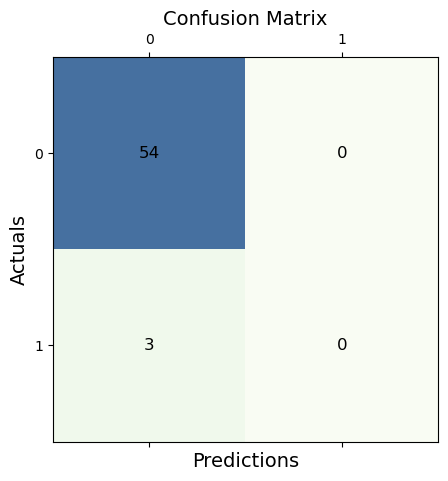

In [62]:
plot_confusion_matrix(all_predictions)